In [1]:
from utils.preprocessing import *
from utils.pseudo_abscence import *
from utils.random_utils import *

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/depr

# MAIN PREPROCESSING TASK

In [16]:
torch_dataset, numpu_dataset = data_preprocess(URLs.url600s, 50, 60, boxes.South_America)

Select the dataset: 

1. data\data.csv

2. data\data_2.csv



Analyzing locations...: 100%|██████████| 15/15 [00:11<00:00,  1.29it/s]


1. Generating pseudo-absence points:

1.1. Min-Max radius analysis


Generating Min-Max radius area ...: 100%|██████████| 15/15 [04:16<00:00, 17.12s/it]


Done!
1.2. Bioclim variable analysis ...


Statistical analysis ...: 100%|██████████| 6/6 [00:00<00:00, 374.97it/s]

Done!
1.3. Picking random pseudo-absence points
Done


In [15]:
for x,y in torch_dataset:
    print(x,y)
    break
x.shape

tensor([ 0.7073,  1.5763,  1.3382,  1.2288,  1.3265,  0.3242,  1.4479, -0.3200,
         0.9427,  1.4377, -0.2729, -0.9873,  0.0354, -1.0706,  1.4798, -0.9985,
        -0.7102,  1.3135, -1.1912,  1.2494,  1.1817]) tensor(0.)


torch.Size([21])

1
2


In [12]:
numpu_dataset[0][1]

array([ 1.47291247,  2.70883614, -1.03542995, -0.36004801, -0.11173214,
       -0.43126245,  0.29833851,  0.32598112, -0.31101484, -1.58701101,
        0.86731972,  0.39370144,  0.53405093, -0.50537248,  0.72612649,
        3.61042435, -0.67285888, -3.37158128,  0.48781463, -0.76619518,
        0.70396036,  3.63270329,  0.77345909, -1.93186617,  1.30380379,
        3.5001711 , -1.20096772, -2.39030558, -0.98215281, -1.12976639,
        0.63504726,  3.3562108 , -0.43204188, -2.87387164,  0.09302576,
        1.56868769, -0.3563525 , -2.10736621, -0.00966788, -2.09605458,
        0.34664971,  1.60658391,  0.        ,  0.        ,  1.47291247,
        2.70883614, -1.03542995, -0.36004801, -0.11173214, -0.43126245,
        0.29833851,  0.32598112, -0.31101484, -1.58701101,  0.86731972,
        0.39370144,  0.53405093, -0.50537248,  0.72612649,  3.61042435,
       -0.67285888, -3.37158128,  0.48781463, -0.76619518,  0.70396036,
        3.63270329,  0.77345909, -1.93186617,  1.30380379,  3.50

# MIN-MAX RADIUS TASK

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth's surface using the Haversine formula.
    """
    R = 6371.0  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance


In [11]:
file_list = glob.glob('/data/*.csv}')
file_list


[]

In [15]:
file_list = glob.glob(os.path.join('data/', "*.csv")) + glob.glob(os.path.join('data/', "*.xlsx"))

In [16]:
file_list

['data\\data.csv']

In [14]:
glob.glob('data/*.csv')

['data\\data.csv']

In [17]:
dependent.describe().T['mean']

Longitude   -49.153361
Latitude    -14.795433
Presence      1.000000
Name: mean, dtype: float64

In [6]:
independent = tif_to_dataframe('variables/10m', bounding_box=boxes.South_America)

In [7]:
independent

NameError: name 'independent' is not defined

In [7]:
len(dependent)

NameError: name 'dependent' is not defined

# MATCHING TASK

In [3]:
dependent = pd.read_csv('data/data.csv')

In [10]:
dependent['Presence'] = 1
dependent = dependent.drop('Unnamed: 0', axis=1)

In [11]:

for idx, isolated_vector in enumerate(dependent.values):
    
    independent['distance'] = independent.apply(lambda row: haversine(isolated_vector[1], isolated_vector[0], row['Latitude'], row['Longitude']), axis=1)
    
    nearest = independent[independent['distance'] == independent['distance'].min()]

    dependent.iloc[idx,:] = (float(nearest['Longitude']), float(nearest['Latitude']), isolated_vector[2])

    break

In [12]:
dependent

,Longitude,Latitude,Presence
0,-46.666667,-10.500000,1
1,-46.595491,-10.569050,1
2,-46.594709,-10.514405,1
3,-46.569772,-10.482991,1
4,-46.616531,-10.445170,1
...,...,...,...
209,-48.947257,-8.752118,1
210,-48.983617,-8.723262,1
211,-70.256001,0.213383,1
212,-37.519376,-10.755561,1


In [ ]:
float(nearest['Latitude']), float(nearest['Longitude'])

In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame from your dataset
data = {
    'latitude': [40.7128, 34.0522, 51.5074],  # Example latitudes
    'longitude': [-74.0060, -118.2437, -0.1278],  # Example longitudes
    # Add more latitude and longitude data here
}

df = pd.DataFrame(data)

# Define the isolated vector
isolated_vector = (37.7749, -122.4194)  # San Francisco

# Calculate distances using Haversine formula and add a new column to the DataFrame
df['distance'] = df.apply(lambda row: haversine(isolated_vector[0], isolated_vector[1], row['latitude'], row['longitude']), axis=1)

# Find the nearest vector
nearest_row = df[df['distance'] == df['distance'].min()]

# Print the nearest vector and distance
print("Nearest vector:")
print(nearest_row)

print("Distance:", nearest_row['distance'].values[0], "km")

In [11]:
import copy 
dep_copy = copy.deepcopy(dependent)

##Variables analysis    (presence, independent)

analysis = dependent.describe().loc[['mean'], ].iloc[:, 2:-1].T.reset_index(drop=True)



,mean


In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points 
    on the Earth's surface using the Haversine formula.
    """
    R = 6371.0  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

def find_nearest_vector(dataset, isolated_vector):
    min_distance = float('inf')
    nearest_vector = None

    for vector in dataset:
        distance = haversine(isolated_vector[0], isolated_vector[1], vector[0], vector[1])
        if distance < min_distance:
            min_distance = distance
            nearest_vector = vector

    return nearest_vector, min_distance

# Example usage
dataset = [
    (40.7128, -74.0060),  # New York City
    (34.0522, -118.2437),  # Los Angeles
    (51.5074, -0.1278),    # London
]

isolated_vector = (37.7749, -122.4194)  # San Francisco

nearest_vector, distance = find_nearest_vector(dataset, isolated_vector)

print("Nearest vector:", nearest_vector)
print("Distance:", distance, "km")

In [4]:
np.linalg.norm(2-3)

1.0

In [ ]:
import pandas as pd
data = {(1,2),(3,4)}
pd.DataFrame(data)

# VARIABLE TASK

In [2]:
#DEPENDENCIES
url = URLs.url600s
bounding_box = boxes.South_America
down_boundary = 70
up_boundary = 100

In [3]:
folder = from_url_tif(url)
independent = tif_to_dataframe(folder, bounding_box)
path = create_path()
dependent = import_targets(path)
presence, dependent = get_presence_dependent(independent, dependent) 
dataframe = absence_generator(presence, dependent, independent, down_boundary, up_boundary)

Select the dataset: 

1. data\data.csv

2. data\data_2.csv



Analyzing locations...: 100%|██████████| 15/15 [00:11<00:00,  1.34it/s]


1. Generating pseudo-absence points:

1.1. Min-Max radius analysis


Generating Min-Max radius area ...: 100%|██████████| 15/15 [04:28<00:00, 17.90s/it]


Done!
1.2. Bioclim variable analysis ...


Statistical analysis ...: 100%|██████████| 6/6 [00:00<00:00, 214.31it/s]

Done!
1.3. Picking random pseudo-absence points
Done


In [5]:
dataframe.columns

Index(['Longitude', 'Latitude', 'bio1', 'bio10', 'bio11', 'bio12', 'bio13',
       'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'Presence', 'Longitude',
       'Latitude', 'bio1', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14',
       'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'bio2', 'bio3', 'bio4',
       'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'Presence'],
      dtype='object')

In [33]:
import copy

filtered_dataframe = copy.deepcopy(complement_df)


print('1.2. Bioclim variable analysis ...')
##Variables analysis    (presence, independent)

main_bio = ['bio1', 'bio3', 'bio5', 'bio6', 'bio7', 'bio12'] ##You can try changing these values, or use all variables

analysis = presence.describe().loc[['mean', 'max'], ].loc[:, main_bio].T.reset_index()


filtered_dataframe['distance'] = 0

for variable, mean, max_value in tqdm(analysis.values, desc = 'Statistical analysis ...'):
    filtered_dataframe['distance'] = filtered_dataframe.apply(lambda row: row['distance'] + float(np.linalg.norm(mean-row[variable]))/max_value, axis = 1)

filtered_dataframe['distance'] = filtered_dataframe.apply(lambda row: row['distance']/6, axis = 1)

filtered_dataframe = filtered_dataframe.sort_values('distance', ascending = False).head(len(presence))

print('Done!')


1.2. Bioclim variable analysis ...


Statistical analysis ...: 100%|██████████| 6/6 [00:00<00:00, 461.66it/s]

Done!


In [34]:
analysis

,index,mean,max
0,bio1,24.308668,26.329626
1,bio3,69.571686,78.265152
2,bio5,33.242191,33.891251
3,bio6,14.993390,21.440331
4,bio7,18.248802,20.230751
5,bio12,1291.066650,1436.000000


In [35]:
filtered_dataframe

,Longitude,Latitude,bio1,bio10,bio11,bio12,bio13,bio14,bio15,bio16,...,bio19,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,distance
79,-39.166667,-3.833333,26.228344,26.970167,25.470207,813.0,209.0,1.0,112.292633,538.0,...,78.0,8.412063,77.368294,60.748989,31.735250,20.862499,10.872751,25.963291,26.186333,0.198041
78,-39.333333,-3.833333,26.390020,27.137917,25.644541,806.0,209.0,2.0,112.347702,528.0,...,79.0,8.728624,77.790031,61.058636,32.104248,20.883499,11.220749,26.093416,26.371834,0.196256
80,-39.333333,-4.000000,26.275126,27.046499,25.504833,763.0,199.0,2.0,111.695709,501.0,...,70.0,8.867084,77.083275,63.109604,32.192001,20.688749,11.503252,26.276291,26.253000,0.194742
81,-39.166667,-4.000000,26.131416,26.905750,25.348625,791.0,205.0,3.0,111.754913,517.0,...,74.0,8.734917,76.825943,63.238815,31.941999,20.572250,11.369749,25.854500,26.062584,0.191458
82,-39.333333,-4.166667,26.195208,26.987667,25.412374,731.0,192.0,2.0,110.637039,479.0,...,60.0,9.178542,76.791832,64.593094,32.353748,20.401251,11.952497,26.188042,26.176624,0.190598
77,-39.166667,-3.666667,26.340708,27.071625,25.589958,928.0,242.0,1.0,112.997025,622.0,...,87.0,8.299251,78.046326,60.123795,31.681499,21.047750,10.633749,26.074207,26.728251,0.190522
76,-39.333333,-3.666667,26.479177,27.196959,25.750916,913.0,243.0,2.0,114.970726,609.0,...,84.0,8.629271,78.488930,58.735516,32.001751,21.007500,10.994251,26.208458,26.854542,0.189224
92,-38.333333,-4.500000,26.569822,27.291458,25.845875,842.0,213.0,3.0,105.335876,530.0,...,99.0,9.340396,79.302071,57.655811,32.399250,20.621000,11.778250,26.344334,26.964167,0.188352
91,-38.500000,-4.500000,26.743126,27.474543,26.013334,836.0,214.0,3.0,105.948097,525.0,...,90.0,9.473042,79.085358,58.677620,32.719501,20.741251,11.978251,26.495125,27.127459,0.187396
96,-38.666667,-4.666667,26.739979,27.451208,26.022751,825.0,212.0,3.0,106.383629,517.0,...,197.0,9.657291,79.394035,57.602001,32.921249,20.757500,12.163750,26.436417,27.164042,0.186916


In [36]:
dependent.columns

Index(['Longitude', 'Latitude', 'bio1', 'bio10', 'bio11', 'bio12', 'bio13',
       'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'bio2', 'bio3',
       'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9', 'distance', 'Presence'],
      dtype='object')

# HEATMAP

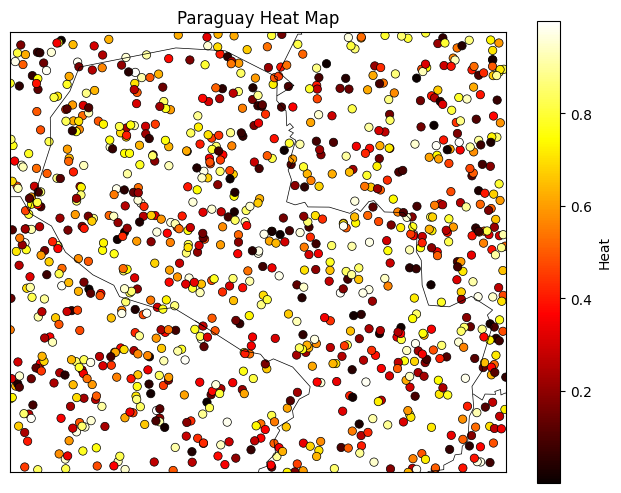

In [5]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# Generate random data for demonstration
num_points = 1000
paraguay_lats = np.random.uniform(low=-27, high=-19, size=num_points)
paraguay_lons = np.random.uniform(low=-63, high=-54, size=num_points)
values = np.random.uniform(low=0, high=1, size=num_points)

# Create a Basemap instance
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-27, urcrnrlat=-19,
            llcrnrlon=-63, urcrnrlon=-54)

# Create a figure and axes
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Draw coastlines and borders
m.drawcoastlines()
m.drawcountries()

# Convert latitudes and longitudes to map coordinates
x, y = m(paraguay_lons, paraguay_lats)

# Plot the heat map using scatter plot
sc = m.scatter(x, y, c=values, cmap='hot', edgecolors='k', linewidth=0.5)

# Add a colorbar
plt.colorbar(sc, label="Heat")

# Set plot title
plt.title("Paraguay Heat Map")

plt.show()

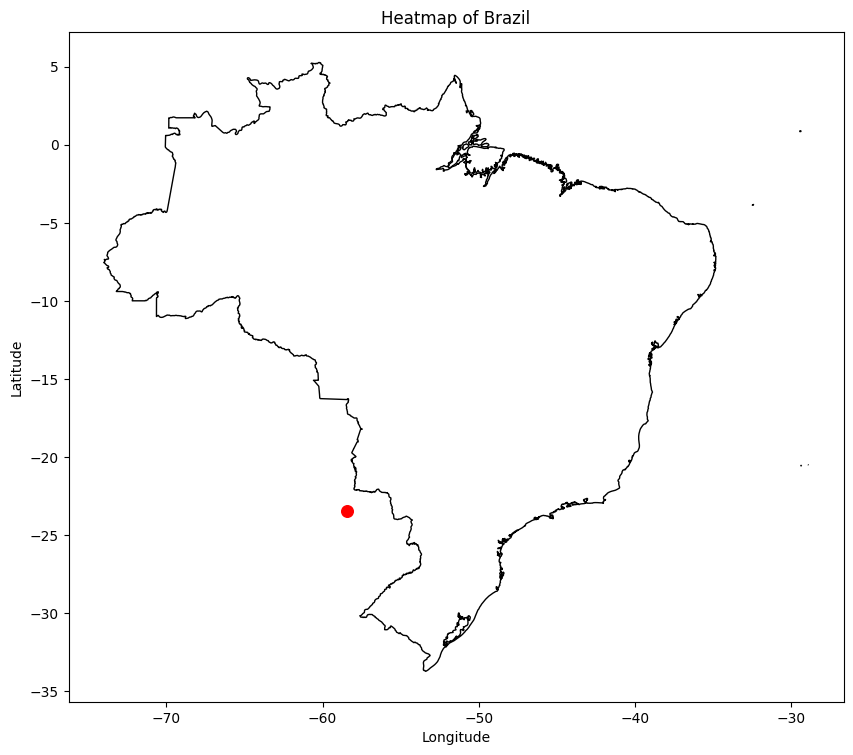

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the longitude, latitude, probability csv
data = pd.read_csv('path_to_')

longitude = data['longitude']
latitude = data['latitude']
probability = data['probability']

geometry = gpd.points_from_xy(longitude, latitude)
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Load Paraguay's shapefile or GeoJSON
country = ''
def get_country():
    global country
    while True:
        country = input('Country name: ')
        with open('utils/map_dependencies/countries.geojson', 'r') as file:
            lines = file.readlines()
            data = None
            for line in lines:
                if country in line:
                    data = line
                    break
            if data is None:
                print('Put again the country name')
                continue
            else:
                break
    path = f'utils/map_dependencies/{country}.geojson'
    with open(path, 'w') as file:
        file.write(data)

    return path

path = get_country()

country = gpd.read_file(path)

data_within_country = gpd.sjoin(geo_data, country, how='inner', op='within')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data_within_country.plot(column='probability', cmap='OrRd', markersize=10, ax=ax, legend=True)
ax.set_title('Species Probability Heatmap (Within Country Boundary)')

# Optionally, you can add other map features like labels, scale bar, etc.

plt.show()

# Sample data with latitude, longitude, and value
data = [
    {'latitude': -23.4425, 'longitude': -58.4438, 'value': 0.7},
    # Add more data points here...
]

# Convert data to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy([d['longitude'] for d in data], [d['latitude'] for d in data]))

# Plot the base map
fig, ax = plt.subplots(figsize=(10, 10))
paraguay.plot(ax=ax, color='white', edgecolor='black')

# Plot the heatmap using scatter plot with size proportional to the value
gdf.plot(ax=ax, marker='o', color='red', markersize=gdf['value'] * 100)

ax.set_title(f'Heatmap of {country}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

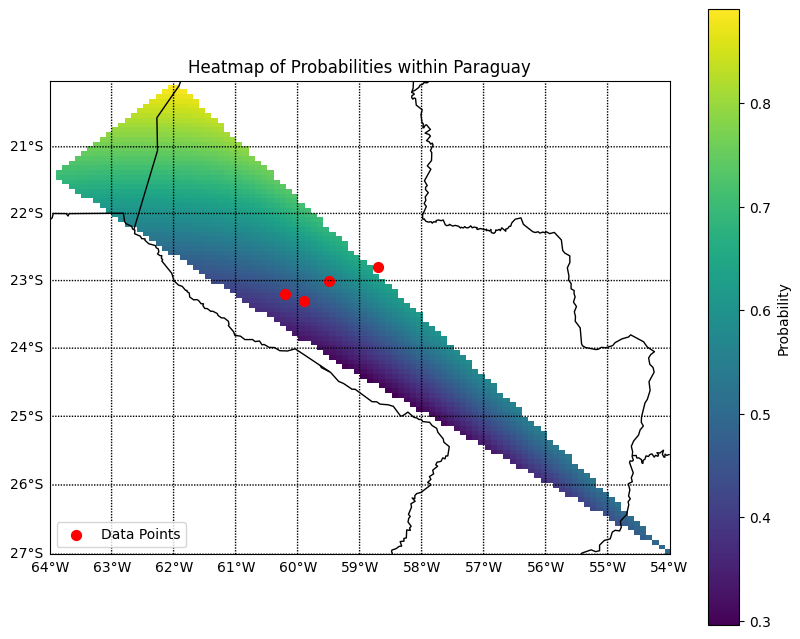

In [14]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a Basemap instance centered around Paraguay
m = Basemap(
    projection='merc',
    llcrnrlat=-27, urcrnrlat=-20,
    llcrnrlon=-64, urcrnrlon=-54,
    resolution='i'
)

# Example geospatial data with latitudes, longitudes, and probabilities
data = np.array([
    [-23.0, -59.5, 0.3],
    [-23.2, -60.2, 0.7],
    [-22.8, -58.7, 0.5],
    [-23.3, -59.9, 0.9]
])

# Create a grid over the study area
x_grid, y_grid = np.meshgrid(np.linspace(data[:, 1].min(), data[:, 1].max(), 100),
                             np.linspace(data[:, 0].min(), data[:, 0].max(), 100))

# Interpolate probabilities onto the grid (example using IDW)
probabilities = data[:, 2]
interpolated_probabilities = griddata(
    (data[:, 1], data[:, 0]),
    probabilities,
    (x_grid, y_grid),
    method='cubic'  # You can use different interpolation methods here
)

# Plot the heatmap using imshow
plt.figure(figsize=(10, 8))
m.drawcountries(linewidth=1)
m.drawcoastlines(linewidth=1)
m.drawparallels(np.arange(-30., -20., 1.), labels=[1,0,0,0])
m.drawmeridians(np.arange(-65., -53., 1.), labels=[0,0,0,1])

# Convert grid latitudes and longitudes to map coordinates
x_map, y_map = m(x_grid, y_grid)

# Plot the heatmap
heatmap = m.imshow(interpolated_probabilities, extent=(x_map.min(), x_map.max(), y_map.min(), y_map.max()), origin='upper', cmap='viridis')

# Add colorbar
plt.colorbar(heatmap, label='Probability')

# Plot data points
x_data, y_data = m(data[:, 1], data[:, 0])
m.scatter(x_data, y_data, c='red', s=50, label='Data Points')

plt.title('Heatmap of Probabilities within Paraguay')
plt.legend()
plt.show()


# Boxes attempt

In [2]:
from utils.preprocessing import *

url = URLs.url600s
path = create_path()

dependent = import_targets(path)

folder = from_url_tif(url)

independent = tif_to_dataframe(folder, 0, dependent)


Select the dataset: 

1. data\data.csv

2. data\data_2.csv

3. data\data_3.csv



Analyzing locations...:   0%|          | 0/4 [00:00<?, ?it/s]c:\Users\jorge\Desktop\PDG\utils\preprocessing.py:164: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dependent.iloc[idx,:] = (float(nearest['Longitude']), float(nearest['Latitude']), isolated_vector[2])
Analyzing locations...: 100%|██████████| 4/4 [00:42<00:00, 10.55s/it]


In [3]:
independent

,Longitude,Latitude,bio1,bio10,bio11,bio12,bio13,bio14,bio15,bio16,...,bio19,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,distance
0,-49.333333,-8.833333,25.877031,26.603958,25.487833,1817.0,276.0,7.0,73.747749,816.0,...,816.0,12.035687,70.238319,48.851891,34.708000,17.572500,17.135500,25.487833,25.823166,1311.901133
1,-49.166667,-8.833333,25.735386,26.453209,25.364208,1807.0,274.0,6.0,74.242233,816.0,...,816.0,11.991312,70.360191,48.779476,34.455002,17.412251,17.042751,25.364208,25.635000,1293.889876
2,-49.000000,-8.833333,25.364624,26.129457,24.971958,1793.0,276.0,6.0,74.454147,814.0,...,814.0,11.935249,69.888733,51.740162,34.112251,17.034750,17.077501,24.971958,25.267876,1275.885572
3,-48.833333,-8.833333,25.071281,25.866167,24.657667,1770.0,277.0,5.0,75.033165,810.0,...,801.0,11.843103,69.576309,53.904411,33.780499,16.758751,17.021748,24.665874,24.966959,1257.888527
4,-48.666667,-8.833333,24.853584,25.715750,24.418417,1761.0,278.0,5.0,75.174904,806.0,...,806.0,11.894041,69.121269,57.880108,33.695999,16.488501,17.207499,24.418417,24.757710,1239.899059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,-39.666667,-15.666667,22.874781,24.627874,20.699333,1041.0,139.0,57.0,26.735401,343.0,...,227.0,8.164354,64.064301,161.067535,28.872499,16.128500,12.743999,23.663666,21.967999,593.471032
2847,-39.500000,-15.666667,23.453697,25.223209,21.350542,1188.0,147.0,71.0,22.498486,365.0,...,275.0,7.907479,63.584118,160.305099,29.368999,16.932751,12.436249,24.199749,22.478083,586.644301
2848,-39.333333,-15.666667,23.801636,25.571541,21.761749,1401.0,155.0,89.0,16.950844,402.0,...,332.0,7.691313,63.327740,159.209152,29.604250,17.459000,12.145250,24.517458,22.802708,580.297983
2849,-39.166667,-15.666667,24.055645,25.831709,22.076874,1583.0,158.0,106.0,12.052392,428.0,...,386.0,7.474958,63.296143,158.559158,29.677750,17.868250,11.809500,24.469666,23.041042,574.448004


# Numpy array

In [12]:
from utils.preprocessing import *
url = URLs.url600s
down_boundary = 100
up_boundary = 125
independent, dataset_torch, numpy_data = data_preprocess_with_pseudo(url, down_boundary, up_boundary)


Select the dataset: 

1. data\data.csv

2. data\data_2.csv

3. data\data_3.csv



Analyzing locations...:   0%|          | 0/4 [00:00<?, ?it/s]c:\Users\jorge\Desktop\PDG\utils\preprocessing.py:164: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dependent.iloc[idx,:] = (float(nearest['Longitude']), float(nearest['Latitude']), isolated_vector[2])
Analyzing locations...:   0%|          | 0/4 [00:00<?, ?it/s]c:\Users\jorge\Desktop\PDG\utils\preprocessing.py:164: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dependent.iloc[idx,:] = (float(nearest['Longitude']), float(nearest['Latitude']), isolated_vector[2])
Analyzing locations...: 100%|██████████| 4/4 [00:00<00:00, 16.95it/s]




1. Generating pseudo-absence points:

1.1. Min-Max radius analysis



Generating Min-Max radius area ...: 100%|██████████| 4/4 [00:05<00:00,  1.28s/it]


Done!
1.2. Bioclim variable analysis ...



Statistical analysis ...: 100%|██████████| 6/6 [00:00<00:00, 260.86it/s]

Done!
1.3. Picking random pseudo-absence points

Done!


In [5]:
independent

,Longitude,Latitude,bio1,bio10,bio11,bio12,bio13,bio14,bio15,bio16,...,bio19,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,distance
0,-50.500000,-7.833333,25.331062,25.895332,24.900126,1928.0,278.0,12.0,65.393486,807.0,...,801.0,12.202667,71.601395,40.371647,34.377750,17.335251,17.042500,24.917749,25.419001,1464.634623
1,-50.333333,-7.833333,25.509260,26.034250,25.083374,1897.0,277.0,12.0,66.127632,803.0,...,796.0,11.947187,72.186256,38.762203,34.230251,17.679750,16.550501,25.104458,25.572750,1446.839309
2,-50.166667,-7.833333,25.781750,26.395750,25.300793,1908.0,278.0,12.0,65.711792,806.0,...,797.0,12.187542,71.196182,44.185669,34.901501,17.783249,17.118252,25.302834,25.941292,1429.056198
3,-50.000000,-7.833333,25.921761,26.564709,25.410751,1898.0,279.0,12.0,66.165390,808.0,...,796.0,12.066021,71.019424,46.546589,35.012249,18.022501,16.989748,25.416876,26.118916,1411.285758
4,-49.833333,-7.833333,25.956854,26.614376,25.415625,1884.0,278.0,12.0,66.459808,808.0,...,808.0,11.989750,71.026176,48.373573,34.989750,18.109001,16.880749,25.415625,26.185583,1393.528475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,-39.833333,-16.666667,23.894188,25.668541,21.710375,1148.0,135.0,54.0,28.003506,394.0,...,194.0,9.220750,67.792160,157.667633,30.530500,16.929001,13.601500,25.083958,21.710375,695.829427
4145,-39.666667,-16.666667,23.831406,25.595333,21.730375,1240.0,143.0,63.0,22.104630,395.0,...,230.0,8.805563,67.091278,154.510544,30.256001,17.131250,13.124750,24.989000,21.730375,689.520333
4146,-39.500000,-16.666667,24.197031,25.985832,22.121250,1341.0,147.0,73.0,16.794586,401.0,...,277.0,8.540438,66.529854,155.929703,30.450001,17.613001,12.837000,24.776125,22.121250,683.626654
4147,-39.333333,-16.666667,24.257114,26.050375,22.230291,1471.0,149.0,85.0,15.992716,418.0,...,334.0,8.154604,65.821320,155.127792,30.300751,17.911749,12.389002,24.802250,26.050375,678.159222


In [8]:
for x,y in dataset_torch:
    print(x.shape)
    print(y)
    break

torch.Size([21])
tensor(1.)


In [17]:
numpy_data[0][0].

(21,)